# Introduction
A non-banking financial institution (NBFI) or non-bank financial company (NBFC) is a Financial Institution that does not have a full banking license or is not supervised by a national or international banking regulatory agency. NBFC facilitates bank-related financial services, such as investment, risk pooling, contractual savings, and market brokering.

An NBFI is struggling to mark profits due to an increase in defaults in the vehicle loan category. The company aims to determine the client’s loan repayment abilities and understand the relative importance of each parameter contributing to a borrower’s ability to repay the loan.

Goal:
The goal of the problem is to predict whether a client will default on the vehicle loan payment or not. For each ID in the Test_Dataset, you must predict the “Default” level.

In [43]:
try:
    # Attempt to access the variable
    path = path
except NameError:
    # If the variable is not defined, set it to None
    path = None

In [45]:
# Import libraries. begin, let's import the necessary libraries that we'll be using throughout this notebook:

# Data Manipulation Libraries
import numpy as np 
import pandas as pd

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [47]:
import os
full_path_files=[]
if path is None:
    for dirname, _, filenames in os.walk('/home/j/.cache/kagglehub/datasets/saurabhbagchi/dish-network-hackathon/versions/1'):
        for filename in filenames:
            print(os.path.join(dirname, filename))
            full_path_files.append(os.path.join(dirname, filename))
else:
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            print(os.path.join(dirname, filename))
            full_path_files.append(os.path.join(dirname, filename))

/home/j/.cache/kagglehub/datasets/saurabhbagchi/dish-network-hackathon/versions/1/Sample_Submission.csv
/home/j/.cache/kagglehub/datasets/saurabhbagchi/dish-network-hackathon/versions/1/Data_Dictionary.csv
/home/j/.cache/kagglehub/datasets/saurabhbagchi/dish-network-hackathon/versions/1/Test_Dataset.csv
/home/j/.cache/kagglehub/datasets/saurabhbagchi/dish-network-hackathon/versions/1/Train_Dataset.csv


In [49]:
full_path_files

['/home/j/.cache/kagglehub/datasets/saurabhbagchi/dish-network-hackathon/versions/1/Sample_Submission.csv',
 '/home/j/.cache/kagglehub/datasets/saurabhbagchi/dish-network-hackathon/versions/1/Data_Dictionary.csv',
 '/home/j/.cache/kagglehub/datasets/saurabhbagchi/dish-network-hackathon/versions/1/Test_Dataset.csv',
 '/home/j/.cache/kagglehub/datasets/saurabhbagchi/dish-network-hackathon/versions/1/Train_Dataset.csv']

In [134]:
for filename in full_path_files:
    if 'Train_Dataset' in filename:
        Train_Dataset=filename
    if 'Test_Dataset' in filename:
        Test_Dataset=filename


In [53]:
Train_Dataset

'/home/j/.cache/kagglehub/datasets/saurabhbagchi/dish-network-hackathon/versions/1/Train_Dataset.csv'

# Exploration the data

In [56]:
df = pd.read_csv(Train_Dataset)
pd.set_option('display.max_columns', None)
df.head()

/tmp/ipykernel_1282734/2592873323.py:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Train_Dataset)


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [58]:
# List of column names representing numerical data features

numerical_data = [["ID", "Client_Income", "Car_Owned", "Bike_Owned", "Active_Loan", "House_Own", "Child_Count",
                  "Credit_Amount", "Loan_Annuity", "Population_Region_Relative", "Age_Days", "Employed_Days", "Registration_Days",
                  "ID_Days", "Own_House_Age", "Mobile_Tag","Homephone_Tag", "Workphone_Working", "Client_Family_Members", 
                   "Cleint_City_Rating", "Application_Process_Day", "Application_Process_Hour", "Score_Source_1",
                   "Score_Source_2", "Score_Source_3", "Social_Circle_Default", "Phone_Change", "Credit_Bureau", "Default"]]

# List of column names representing categorical data features
categorical_data = ["Accompany_Client", "Client_Income_Type", "Client_Education", "Client_Marital_Status", "Client_Gender",
                    "Loan_Contract_Type", "Client_Housing_Type", "Client_Occupation", "Client_Permanent_Match_Tag", 
                     "Client_Contact_Work_Tag", 
                     "Type_Organization"]

In [60]:
# Display the data types of each column
df.dtypes

ID                              int64
Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

Some data types are not properly formatted, so we need to fix them. For example, there are numeric data stored as objects, and we need to convert them to the appropriate numeric data type.

## Handle data types of data

In [64]:
# Clean and convert 'Client_Income' column to numeric
df['Client_Income'] = pd.to_numeric(df['Client_Income'], errors='coerce')

In [66]:
# Clean and convert 'Credit_Amount' column to numeric
df['Credit_Amount'] = df['Credit_Amount'].str.replace('[^0-9.]', '', regex=True)
df['Credit_Amount'] = pd.to_numeric(df['Credit_Amount'], errors='coerce')
df['Credit_Amount'] = pd.to_numeric(df['Credit_Amount'], errors='coerce')

In [68]:
# Clean and convert 'Loan_Annuity' column to numeric
df['Loan_Annuity'] = df['Loan_Annuity'].str.replace('[^0-9.]', '', regex=True)
df['Loan_Annuity'] = pd.to_numeric(df['Loan_Annuity'], errors='coerce')

In [70]:
# Clean and convert 'Population_Region_Relative' column to numeric
df['Population_Region_Relative'] = df['Population_Region_Relative'].str.replace('[^0-9.]', '', regex=True)
df['Population_Region_Relative'] = pd.to_numeric(df['Population_Region_Relative'], errors='coerce')

In [72]:
# Clean and convert 'Age_Days' column to numeric
df['Age_Days'] = df['Age_Days'].str.replace('[^0-9.]', '', regex=True)
df['Age_Days'] = pd.to_numeric(df['Age_Days'], errors='coerce')


In [74]:
# Clean and convert 'Employed_Days' column to numeric
df['Employed_Days'] = df['Employed_Days'].str.replace('[^0-9.]', '', regex=True)
df['Employed_Days'] = pd.to_numeric(df['Employed_Days'], errors='coerce')

In [76]:
# Clean and convert 'Registration_Days' column to numeric
df['Registration_Days'] = df['Registration_Days'].str.replace('[^0-9.]', '', regex=True)
df['Registration_Days'] = pd.to_numeric(df['Registration_Days'], errors='coerce')

In [78]:
# Clean and convert 'Score_Source_3' column to numeric
df['Score_Source_3'] = df['Score_Source_3'].str.replace('[^0-9.]', '', regex=True)
df['Score_Source_3'] = pd.to_numeric(df['Score_Source_3'], errors='coerce')

In [80]:
# Check the the data types of each column again
df.dtypes

ID                              int64
Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

In [82]:
# Display the dimensions (number of rows and columns) of the DataFrame
df.shape

(121856, 40)

In [84]:
# Count the total number of duplicate rows in the DataFrame
df.duplicated().sum()

0

In [86]:
# Count the total number of missing values in each column of the DataFrame
df.isna().sum()

ID                                 0
Client_Income                   3622
Car_Owned                       3581
Bike_Owned                      3624
Active_Loan                     3635
House_Own                       3661
Child_Count                     3638
Credit_Amount                  83138
Loan_Annuity                   27498
Accompany_Client                1746
Client_Income_Type              3701
Client_Education                3645
Client_Marital_Status           3473
Client_Gender                   2413
Loan_Contract_Type              3651
Client_Housing_Type             3687
Population_Region_Relative     43231
Age_Days                       10582
Employed_Days                  10631
Registration_Days              10589
ID_Days                         5968
Own_House_Age                  80095
Mobile_Tag                         0
Homephone_Tag                      0
Workphone_Working                  0
Client_Occupation              41435
Client_Family_Members           2410
C

## Handle null values

We will handle missing data using Iterative Imputation technique. Before that, we need to encode the data.We will handle missing data using Iterative Imputation. Before applying this technique, we need to encode the data. Iterative Imputation is a method for filling in missing values by iteratively estimating them based on other available features. Encoding the data involves converting categorical variables into numerical format, which allows us to apply Iterative Imputation effectively.

In [91]:
# Print the value counts of each unique value in the column
for i in categorical_data:
    print(df[i].value_counts())
    print('-' * 50)

Accompany_Client
Alone       97409
Relative    15748
Partner      4516
Kids         1334
Others        987
Group         104
##             12
Name: count, dtype: int64
--------------------------------------------------
Client_Income_Type
Service            61028
Commercial         27764
Retired            21043
Govt Job            8303
Student                8
Unemployed             6
Maternity leave        2
Businessman            1
Name: count, dtype: int64
--------------------------------------------------
Client_Education
Secondary             83911
Graduation            28819
Graduation dropout     3960
Junior secondary       1455
Post Grad                66
Name: count, dtype: int64
--------------------------------------------------
Client_Marital_Status
M    87349
S    17404
D     7556
W     6074
Name: count, dtype: int64
--------------------------------------------------
Client_Gender
Male      78463
Female    40977
XNA           3
Name: count, dtype: int64
-------------------

there are some data points that are not evenly spread out across different categories or groups, and the solution is to combine them into larger categories or groups to improve the distribution.

In [94]:
# Define a mapping dictionary to combine the clusters
cluster_mapping = {"Transport: type 1":"Others", "Industry: type 10 ":"Others" ,"Industry: type 6":"Others", 
                   "Religion":"Others", "Industry: type 13":"Others", "Trade: type 4":"Others", "Trade: type 4":"Others", 
                   "Industry: type 8":"Others"}

# Update the "Client_Income_Type" column with the new cluster labels
df["Client_Income_Type"] = df["Client_Income_Type"].replace(cluster_mapping)

# Check the value_counts after replacing
df["Client_Income_Type"].value_counts()

Client_Income_Type
Service            61028
Commercial         27764
Retired            21043
Govt Job            8303
Student                8
Unemployed             6
Maternity leave        2
Businessman            1
Name: count, dtype: int64

In [96]:
# Define a mapping dictionary to combine the clusters
cluster_mapping = {"Student":"Govt Job", "Unemployed":"Govt Job" ,"Maternity leave":"Govt Job", "Businessman":"Govt Job"}

# Update the "Client_Income_Type" column with the new cluster labels
df["Client_Income_Type"] = df["Client_Income_Type"].replace(cluster_mapping)

# Check the value_counts after replacing
df["Client_Income_Type"].value_counts()

Client_Income_Type
Service       61028
Commercial    27764
Retired       21043
Govt Job       8320
Name: count, dtype: int64

In [98]:
# Define a mapping dictionary to combine the clusters
cluster_mapping = {"Post Grad":"Junior secondary"}

# Update the "Client_Income_Type" column with the new cluster labels
df["Client_Education"] = df["Client_Education"].replace(cluster_mapping)

# Check the value_counts after replacing
df["Client_Education"].value_counts()

Client_Education
Secondary             83911
Graduation            28819
Graduation dropout     3960
Junior secondary       1521
Name: count, dtype: int64

In [100]:
# Create a boolean mask to identify rows where "Client_Gender" is "XNA"
mask = df["Client_Gender"] == "XNA"

# Use the mask to drop the corresponding rows
df.drop(df[mask].index, inplace=True)

# Print the value counts of the "Client_Gender" column after removal
df['Client_Gender'].value_counts()

Client_Gender
Male      78463
Female    40977
Name: count, dtype: int64

In [102]:
# Define a mapping dictionary to combine the clusters
cluster_mapping = {"##" : "Others", "Group" : "Others"}

# Update the "Accompany_Client" column with the new cluster labels
df["Accompany_Client"] = df["Accompany_Client"].replace(cluster_mapping)

# Check the value_counts after replacing
df["Accompany_Client"].value_counts()

Accompany_Client
Alone       97407
Relative    15747
Partner      4516
Kids         1334
Others       1103
Name: count, dtype: int64

In [104]:
# Label Encoding.
label_encoder = LabelEncoder()

for i in categorical_data:
    df[i] = label_encoder.fit_transform(df[i])
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,0,0,3,1,1,0,1,0.028663,13957.0,1062.0,6123.0,383,NaN,1,1,0,14,2.0,2.0,6.0,17.0,1,1,42,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,0,3,0,1,1,0,1,0.008575,14162.0,4129.0,7833.0,21,0.0,1,0,1,18,2.0,2.0,3.0,10.0,1,1,11,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,0,3,1,3,1,0,0,0.022800,16790.0,5102.0,NaN,331,NaN,1,0,0,13,2.0,2.0,4.0,NaN,1,1,42,NaN,0.552795,NaN,0.0742,277.0,0.0,0
3,12188929,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,0,2,3,1,1,0,1,0.010556,23195.0,365243.0,NaN,775,NaN,1,0,0,18,2.0,3.0,2.0,15.0,1,1,57,NaN,0.135182,NaN,NaN,1700.0,3.0,0
4,12133385,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,0,0,3,1,0,0,1,0.020713,11366.0,2977.0,5516.0,4043,6.0,1,0,0,8,4.0,1.0,3.0,NaN,1,1,5,0.508199,0.301182,NaN,0.2021,674.0,1.0,0


When running Iterative Imputation,We encounter data marked as 'x', we need to locate where this data is in the dataset and convert it to NaN (missing value). This ensures that the Iterative Imputation algorithm treats 'x' values as missing values and imputes them accordingly.

In [107]:
# Filter the DataFrame to retain only rows where at least one element contains the string 'x'
filtered_df = df[df.applymap(lambda x: isinstance(x, str) and 'x' in x).any(axis=1)]
filtered_df

/tmp/ipykernel_1282734/3731503088.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_df = df[df.applymap(lambda x: isinstance(x, str) and 'x' in x).any(axis=1)]


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
16335,12182976,7650.0,0.0,1.0,1.0,1.0,0.0,9669.6,483.30,0,4,3,1,1,0,1,0.009549,NaN,NaN,NaN,x,NaN,1,0,0,8,2.0,2.0,5.0,11.0,1,1,4,0.391044,0.622292,NaN,NaN,547.0,5.0,0
30043,12193379,13500.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,0,3,1,1,0,2,0.072508,NaN,NaN,NaN,x,NaN,1,0,1,6,2.0,1.0,3.0,11.0,1,1,55,0.745922,0.779345,0.736623,0.4268,3288.0,2.0,0
35293,12188608,14400.0,0.0,0.0,0.0,1.0,0.0,102202.2,4342.95,0,2,0,4,1,0,1,0.018634,NaN,NaN,NaN,x,NaN,1,0,0,18,2.0,2.0,1.0,9.0,1,1,57,NaN,0.386343,NaN,NaN,1002.0,NaN,0
49802,12137970,11250.0,1.0,1.0,0.0,1.0,1.0,NaN,553.95,0,3,3,1,0,2,1,NaN,NaN,NaN,NaN,x,9.0,1,0,0,18,3.0,2.0,5.0,10.0,1,0,3,NaN,0.481226,NaN,NaN,0.0,0.0,0
50492,12162008,45000.0,0.0,0.0,0.0,1.0,0.0,NaN,4875.30,0,0,0,1,0,0,1,NaN,NaN,NaN,NaN,x,NaN,1,1,0,10,2.0,2.0,4.0,14.0,0,1,5,NaN,0.489135,NaN,0.0515,832.0,0.0,0
52724,12168302,18900.0,0.0,0.0,0.0,1.0,0.0,NaN,3115.35,0,1,0,1,1,0,1,NaN,NaN,NaN,NaN,x,NaN,1,0,0,3,2.0,1.0,6.0,14.0,1,1,39,NaN,0.759379,NaN,NaN,464.0,1.0,0
59383,12120552,NaN,0.0,0.0,0.0,1.0,0.0,NaN,2719.35,0,0,3,1,1,0,1,NaN,NaN,NaN,NaN,x,NaN,1,0,1,8,2.0,2.0,1.0,NaN,1,1,5,NaN,0.673944,NaN,0.1206,1585.0,5.0,0
66390,12136418,12150.0,0.0,1.0,0.0,1.0,0.0,NaN,3349.35,0,2,0,3,1,0,1,NaN,NaN,NaN,NaN,x,NaN,1,0,0,18,1.0,NaN,5.0,13.0,1,1,57,NaN,0.799336,NaN,0.0742,2029.0,3.0,1
70325,12162067,18000.0,0.0,0.0,0.0,1.0,2.0,NaN,963.00,0,0,0,1,0,0,1,NaN,NaN,NaN,NaN,x,NaN,1,0,0,18,NaN,2.0,5.0,18.0,1,1,30,NaN,0.693446,NaN,0.1552,78.0,0.0,0
72965,12164158,31500.0,0.0,0.0,0.0,1.0,0.0,NaN,3227.40,0,3,3,1,1,0,1,NaN,NaN,NaN,NaN,x,NaN,1,0,0,8,2.0,2.0,2.0,16.0,1,1,42,0.216824,0.522478,NaN,0.0495,99.0,2.0,0


In [108]:
# Create a boolean mask to identify rows where "ID_Days" is equal to "x"
mask = df["ID_Days"] == "x"

# Replace the corresponding rows with NaN
df.loc[mask, "ID_Days"] = np.nan

In [111]:
# Initialize the IterativeImputer
imputer = IterativeImputer()

# Fit and transform the data using IterativeImputer
Iterative_imputer = imputer.fit_transform(df)

# Create a new DataFrame with imputed values
df = pd.DataFrame(Iterative_imputer, columns=df.columns)

# Check the total number of missing values in each column of the DataFrame
df.isna().sum()

/home/j/anaconda3/lib/python3.12/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


ID                            0
Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Own_House_Age                 0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_C

# Modeling

In [113]:
# Remove the column names from the numerical_data list
numerical_data_values = numerical_data[0][1:-1]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler on the selected columns to calculate mean and standard deviation
scaler.fit(df[numerical_data_values])

# Transform the selected columns using the calculated mean and standard deviation
df[numerical_data_values] = scaler.transform(df[numerical_data_values])
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509.0,-0.881591,-0.731240,-0.709947,1.008579,-1.517744,-0.574637,-0.002865,0.515217,0.0,0.0,3.0,1.0,1.0,0.0,1.0,-0.002856,-0.478171,-0.481886,0.338046,-1.758133,0.027831,0.002865,1.997010,-0.625440,14.0,-0.168318,-0.059893,1.630656,1.521732,1.0,1.0,42.0,0.006005,0.002862,-0.002871,-0.871944,0.002156,0.002861,0.0
1,12138936.0,0.293834,1.401656,-0.709947,1.008579,0.412413,-0.574637,-0.002873,-0.663056,0.0,3.0,0.0,1.0,1.0,0.0,1.0,-0.002881,-0.430395,-0.459446,0.841743,-2.002481,-0.475249,0.002865,-0.500749,1.598875,18.0,-0.168318,-0.059893,-0.091730,-0.636185,1.0,1.0,11.0,0.005609,0.002847,-0.002867,0.133580,0.002723,0.002864,0.0
2,12181264.0,0.097930,-0.731240,-0.709947,1.008579,-1.517744,0.801193,-0.002865,0.049442,0.0,3.0,1.0,3.0,1.0,0.0,0.0,-0.002863,0.182069,-0.452326,0.009087,-1.793233,0.039209,0.002865,-0.500749,-0.625440,13.0,-0.168318,-0.059893,0.482399,-0.029187,1.0,1.0,42.0,0.008219,0.002867,-0.002866,-0.330123,0.002325,0.002854,0.0
3,12188929.0,-0.097974,-0.731240,-0.709947,1.008579,0.675291,-0.574637,-0.002866,-0.315642,0.0,2.0,3.0,1.0,1.0,0.0,1.0,-0.002879,1.674776,2.182768,0.436345,-1.493535,0.035171,0.002865,-0.500749,-0.625440,18.0,-0.168318,1.938358,-0.665859,0.905184,1.0,1.0,57.0,0.020412,0.002843,-0.002864,-0.336110,0.003446,0.002871,0.0
4,12133385.0,1.469258,1.401656,-0.709947,1.008579,-1.517744,2.177024,-0.002851,0.611906,0.0,0.0,3.0,1.0,0.0,0.0,1.0,-0.002866,-1.082012,-0.467875,0.159249,0.712349,-0.234128,0.002865,-0.500749,-0.625440,8.0,2.005068,-2.058144,-0.091730,0.797717,1.0,1.0,5.0,0.000957,0.002852,-0.002854,0.916260,0.002638,0.002860,0.0


In [114]:
# Split data into x and y.
X = df.drop("Default", axis=1)
y = df["Default"]

# Split train data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [115]:
# Initialize the LogisticRegression with modified parameters
logistic_classifier = LogisticRegression(class_weight='balanced', penalty='l2', solver='liblinear', random_state=42)

# Train the model on the scaled training data
logistic_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logistic_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")

Accuracy: 92.04781704781705 %


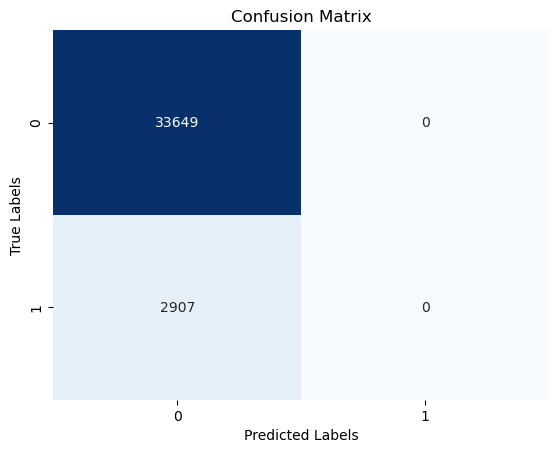

In [116]:
# Create and Plot a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

The data distribution is not good, which is causing poor prediction results. The model is biased towards predicting that everyone will repay the loan, leading to significant risk. To address this, we will perform data resampling.

## Resampling tha data

In [119]:
# Instantiate the SMOTE class
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Perform SMOTE oversampling on the dataset
X_overesampled, y_overesampled = smote.fit_resample(X_train, y_train)

In [120]:
# Train the model on the scaled training data
logistic_classifier.fit(X_overesampled, y_overesampled)

# Make predictions on the testing data
y_pred = logistic_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")

Accuracy: 60.15975489659701 %


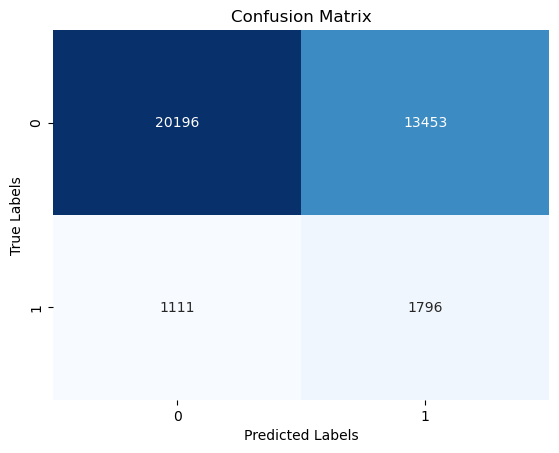

In [121]:
# Create and Plot a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap
# plt.figure(figsize=(15, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [122]:
# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

print("F1 score:", f1)

F1 score: 0.19784093412645956


The result isn't perfect, but it's still better.

# Preperation the test data

In [136]:
test = pd.read_csv(Test_Dataset)
test.head()

/tmp/ipykernel_1282734/3716667606.py:1: DtypeWarning: Columns (7,8,16,17,18,19,20,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv(Test_Dataset)


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau
0,12202227,11250,0.0,1.0,1.0,1.0,0.0,112500,4474.8,Relative,Service,NaN,M,Male,CL,Home,0.019101,20063,2523,2318,3318,NaN,1,0,0,NaN,NaN,2.0,4.0,16.0,Yes,Yes,Self-employed,NaN,0.757151,0.629674,0.0515,716.0,2.0
1,12279381,13500,1.0,1.0,1.0,1.0,3.0,49752,3252.15,Alone,Service,Secondary,M,Female,CL,Home,0.0105,13200,551,6972,3865,6.0,1,1,0,Laborers,5.0,3.0,3.0,18.0,No,Yes,Self-employed,NaN,0.342269,NaN,NaN,181.0,NaN
2,12222714,38250,0.0,1.0,0.0,1.0,0.0,67500,3375,Alone,Commercial,Graduation,M,Female,RL,Home,0.032561,15943,1319,981,2296,NaN,1,0,1,Managers,2.0,1.0,2.0,19.0,Yes,Yes,Business Entity Type 3,NaN,0.683665,NaN,0.1503,281.0,NaN
3,12265215,20250,0.0,0.0,1.0,0.0,0.0,50849.55,3814.65,Alone,Govt Job,Secondary,S,Male,CL,NaN,0.01452,15634,1510,4975,6121,NaN,1,1,1,NaN,1.0,2.0,6.0,20.0,No,No,Medicine,0.351581,0.22995,0.672243,NaN,1442.0,4.0
4,12203970,13500,1.0,1.0,0.0,1.0,0.0,43603.2,2515.95,Alone,Service,Secondary,M,Female,CL,Home,0.008625,15811,1075,5478,3618,7.0,1,0,0,Managers,2.0,2.0,1.0,13.0,Yes,Yes,Self-employed,0.731110,0.566971,0.730987,NaN,927.0,1.0


## Handle data types

In [139]:
test.dtypes

ID                              int64
Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

In [141]:
# Clean and convert 'Credit_Amount' column to numeric
test['Credit_Amount'] = test['Credit_Amount'].str.replace('[^0-9.]', '', regex=True)
test['Credit_Amount'] = pd.to_numeric(test['Credit_Amount'], errors='coerce')
test['Credit_Amount'] = pd.to_numeric(test['Credit_Amount'], errors='coerce')

# Clean and convert 'Loan_Annuity' column to numeric
test['Loan_Annuity'] = test['Loan_Annuity'].str.replace('[^0-9.]', '', regex=True)
test['Loan_Annuity'] = pd.to_numeric(test['Loan_Annuity'], errors='coerce')

# Clean and convert 'Population_Region_Relative' column to numeric
test['Population_Region_Relative'] = test['Population_Region_Relative'].str.replace('[^0-9.]', '', regex=True)
test['Population_Region_Relative'] = pd.to_numeric(test['Population_Region_Relative'], errors='coerce')

# Clean and convert 'Age_Days' column to numeric
test['Age_Days'] = test['Age_Days'].str.replace('[^0-9.]', '', regex=True)
test['Age_Days'] = pd.to_numeric(test['Age_Days'], errors='coerce')

# Clean and convert 'Employed_Days' column to numeric
test['Employed_Days'] = test['Employed_Days'].str.replace('[^0-9.]', '', regex=True)
test['Employed_Days'] = pd.to_numeric(test['Employed_Days'], errors='coerce')

# Clean and convert 'Registration_Days' column to numeric
test['Registration_Days'] = test['Registration_Days'].str.replace('[^0-9.]', '', regex=True)
test['Registration_Days'] = pd.to_numeric(test['Registration_Days'], errors='coerce')

# Clean and convert 'Score_Source_2' column to numeric
test['Score_Source_2'] = test['Score_Source_2'].str.replace('[^0-9.]', '', regex=True)
test['Score_Source_2'] = pd.to_numeric(test['Score_Source_2'], errors='coerce')

# Clean and convert 'Score_Source_3' column to numeric
test['Score_Source_3'] = test['Score_Source_3'].str.replace('[^0-9.]', '', regex=True)
test['Score_Source_3'] = pd.to_numeric(test['Score_Source_3'], errors='coerce')

# Check the the data types of each column again
test.dtypes

ID                              int64
Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

In [142]:
test.duplicated().sum()

0

## Handle null values

In [144]:
test.isna().sum()

ID                                0
Client_Income                  2434
Car_Owned                      2405
Bike_Owned                     2486
Active_Loan                    2454
House_Own                      2347
Child_Count                    2328
Credit_Amount                 34119
Loan_Annuity                  34658
Accompany_Client               1208
Client_Income_Type             2501
Client_Education               2350
Client_Marital_Status          2443
Client_Gender                  1627
Loan_Contract_Type             2321
Client_Housing_Type            2408
Population_Region_Relative    18971
Age_Days                      50105
Employed_Days                 50071
Registration_Days             50094
ID_Days                        3881
Own_House_Age                 53581
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             27845
Client_Family_Members          1644
Cleint_City_Rating          

In [145]:
# Print the value counts of each unique value in the column
for i in categorical_data:
    print(test[i].value_counts())
    print('-' * 50)

Accompany_Client
Alone       64786
Relative    10349
Partner      2967
Kids          855
Others        664
Group          67
##              4
Name: count, dtype: int64
--------------------------------------------------
Client_Income_Type
Service        40473
Commercial     18237
Retired        14199
Govt Job        5481
Unemployed         4
Student            3
Businessman        2
Name: count, dtype: int64
--------------------------------------------------
Client_Education
Secondary             55688
Graduation            19194
Graduation dropout     2663
junior secondary        966
Post Grad                39
Name: count, dtype: int64
--------------------------------------------------
Client_Marital_Status
M          57605
S          11737
D           5041
W           4073
Unknown        1
Name: count, dtype: int64
--------------------------------------------------
Client_Gender
Male      52146
Female    27126
XNA           1
Name: count, dtype: int64
-------------------------------

In [146]:
# Define a mapping dictionary to combine the clusters
cluster_mapping = {"Transport: type 1":"Others", "Industry: type 10 ":"Others" ,"Industry: type 6":"Others", 
                   "Religion":"Others", "Industry: type 13":"Others", "Trade: type 4":"Others", "Trade: type 4":"Others", 
                   "Industry: type 8":"Others"}
# Update the "Client_Income_Type" column with the new cluster labels
test["Client_Income_Type"] = test["Client_Income_Type"].replace(cluster_mapping)

# Define a mapping dictionary to combine the clusters
cluster_mapping = {"Student":"Govt Job", "Unemployed":"Govt Job" ,"Maternity leave":"Govt Job", "Businessman":"Govt Job"}
# Update the "Client_Income_Type" column with the new cluster labels
test["Client_Income_Type"] = test["Client_Income_Type"].replace(cluster_mapping)

# Define a mapping dictionary to combine the clusters
cluster_mapping = {"Post Grad":"Junior secondary"}
# Update the "Client_Income_Type" column with the new cluster labels
test["Client_Education"] = test["Client_Education"].replace(cluster_mapping)

# Create a boolean mask to identify rows where "Client_Gender" is "XNA"
mask = test["Client_Gender"] == "XNA"
# Use the mask to drop the corresponding rows
test.drop(test[mask].index, inplace=True)

# Define a mapping dictionary to combine the clusters
cluster_mapping = {"##" : "Others", "Group" : "Others"}
# Update the "Accompany_Client" column with the new cluster labels
test["Accompany_Client"] = test["Accompany_Client"].replace(cluster_mapping)

# Label Encoding.
label_encoder = LabelEncoder()
for i in categorical_data:
    test[i] = label_encoder.fit_transform(test[i])
test.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau
0,12202227,11250,0.0,1.0,1.0,1.0,0.0,112500.00,4474.80,4,3,5,1,1,0,1,0.019101,20063.0,2523.0,2318.0,3318,NaN,1,0,0,18,NaN,2.0,4.0,16.0,1,1,42,NaN,NaN,NaN,0.0515,716.0,2.0
1,12279381,13500,1.0,1.0,1.0,1.0,3.0,49752.00,3252.15,0,3,3,1,0,0,1,0.010500,13200.0,551.0,6972.0,3865,6.0,1,1,0,8,5.0,3.0,3.0,18.0,0,1,42,NaN,NaN,NaN,NaN,181.0,NaN
2,12222714,38250,0.0,1.0,0.0,1.0,0.0,67500.00,3375.00,0,0,0,1,0,1,1,0.032561,15943.0,1319.0,981.0,2296,NaN,1,0,1,10,2.0,1.0,2.0,19.0,1,1,5,NaN,NaN,NaN,0.1503,281.0,NaN
3,12265215,20250,0.0,0.0,1.0,0.0,0.0,50849.55,3814.65,0,1,3,2,1,0,6,0.014520,15634.0,1510.0,4975.0,6121,NaN,1,1,1,18,1.0,2.0,6.0,20.0,0,0,30,0.351581,NaN,NaN,NaN,1442.0,4.0
4,12203970,13500,1.0,1.0,0.0,1.0,0.0,43603.20,2515.95,0,3,3,1,0,0,1,0.008625,15811.0,1075.0,5478.0,3618,7.0,1,0,0,10,2.0,2.0,1.0,13.0,1,1,42,0.731110,NaN,NaN,NaN,927.0,1.0


In [147]:
# Filter the DataFrame to retain only rows where at least one element contains the string 'x'
filtered_df = test[test.applymap(lambda x: isinstance(x, str) and '$' in x).any(axis=1)]
filtered_df

/tmp/ipykernel_1282734/3356268241.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_df = test[test.applymap(lambda x: isinstance(x, str) and '$' in x).any(axis=1)]


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau
5321,12270300,$,0.0,0.0,0.0,1.0,0.0,7200.00,403.65,0,2,3,1,1,0,1,0.028663,20507.0,365243.0,7691.0,3652,NaN,1,0,0,18,2.0,2.0,1.0,14.0,1,1,57,NaN,NaN,NaN,0.1485,584.0,NaN
12780,12249635,$,0.0,0.0,1.0,1.0,0.0,14836.50,1067.85,4,2,3,1,1,0,1,0.019101,23972.0,365243.0,10321.0,4578,NaN,1,0,1,18,2.0,2.0,1.0,9.0,1,1,57,NaN,NaN,NaN,0.0859,1871.0,1.0
17856,12201917,$,1.0,NaN,1.0,0.0,1.0,NaN,NaN,4,3,3,1,0,0,1,0.004960,NaN,NaN,NaN,3952.0,20.0,1,1,1,4,3.0,2.0,0.0,12.0,1,0,42,NaN,NaN,NaN,NaN,949.0,1.0
22902,12212941,$,1.0,1.0,NaN,1.0,0.0,NaN,NaN,4,0,3,2,0,0,1,0.025164,NaN,NaN,NaN,2158.0,7.0,1,0,0,4,1.0,2.0,5.0,11.0,1,1,55,NaN,NaN,NaN,0.0175,0.0,NaN
38402,12275249,$,NaN,1.0,1.0,1.0,1.0,NaN,NaN,4,3,3,1,2,0,1,0.031329,NaN,NaN,NaN,NaN,4.0,1,0,0,8,3.0,2.0,1.0,15.0,1,1,42,NaN,0.747540,0.401407,0.2577,1048.0,3.0
46574,12253273,$,0.0,0.0,1.0,1.0,0.0,NaN,NaN,0,2,3,2,1,0,1,0.035792,NaN,NaN,NaN,2884.0,NaN,1,0,0,18,1.0,2.0,4.0,15.0,1,1,57,NaN,NaN,0.694093,0.1680,391.0,0.0
48863,12262322,$,0.0,1.0,0.0,1.0,0.0,NaN,NaN,0,2,3,4,1,0,1,0.031329,NaN,NaN,NaN,4172.0,NaN,1,0,0,18,1.0,2.0,2.0,9.0,1,1,57,NaN,0.668273,0.643026,NaN,2386.0,0.0
53929,12231758,$,0.0,1.0,0.0,0.0,1.0,89476.65,2970.00,0,3,3,1,1,0,0,NaN,NaN,NaN,NaN,4276.0,NaN,1,0,0,3,3.0,2.0,1.0,15.0,1,1,47,0.423322,NaN,NaN,NaN,NaN,NaN
54178,12212752,$,1.0,0.0,0.0,0.0,0.0,45000.00,2201.85,0,3,3,1,0,0,1,NaN,NaN,NaN,NaN,4119.0,21.0,1,0,0,18,2.0,2.0,5.0,12.0,0,1,4,0.314955,NaN,NaN,NaN,2285.0,3.0
56461,12259417,$,1.0,1.0,0.0,1.0,0.0,28887.30,2295.00,0,3,3,2,2,0,1,NaN,NaN,NaN,NaN,NaN,15.0,1,0,0,8,1.0,2.0,2.0,14.0,1,0,42,NaN,NaN,NaN,NaN,1908.0,1.0


In [149]:
# Create a boolean mask to identify rows where "Client_Income" is equal to "$"
mask = test["Client_Income"] == "$"

# Replace the corresponding rows with NaN
test.loc[mask, "Client_Income"] = np.nan

In [150]:
# Filter the DataFrame to retain only rows where at least one element contains the string 'x'
filtered_df = test[test.applymap(lambda x: isinstance(x, str) and 'x' in x).any(axis=1)]
filtered_df

/tmp/ipykernel_1282734/2427847469.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_df = test[test.applymap(lambda x: isinstance(x, str) and 'x' in x).any(axis=1)]


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau
4669,12245941,14400,1.0,1.0,0.0,1.0,2.0,30220.65,1595.25,0,1,3,1,1,0,0,0.020246,NaN,NaN,NaN,x,13.0,1,0,0,11,4.0,3.0,3.0,14.0,1,1,30,0.407879,NaN,NaN,0.0309,1293.0,3.0
11244,12206037,15750,1.0,1.0,0.0,1.0,NaN,45450.00,2199.60,0,3,3,1,0,0,6,0.028663,NaN,NaN,NaN,x,7.0,1,0,0,18,3.0,2.0,4.0,7.0,1,0,5,NaN,NaN,NaN,NaN,727.0,8.0
69987,12276537,13500,0.0,0.0,0.0,1.0,0.0,38700.00,1817.10,0,2,3,4,1,0,1,0.010643,NaN,NaN,NaN,x,NaN,1,0,0,18,1.0,2.0,3.0,10.0,1,1,58,NaN,NaN,NaN,NaN,526.0,NaN
72668,12234419,27000,1.0,0.0,0.0,1.0,1.0,176211.00,4858.65,4,0,1,1,0,0,1,0.019689,NaN,NaN,NaN,x,3.0,1,0,0,10,3.0,2.0,3.0,16.0,1,1,42,NaN,NaN,0.639708,NaN,1011.0,0.0
79804,12209438,33750,0.0,1.0,1.0,0.0,1.0,90000.00,4500.00,4,0,3,1,0,1,1,0.046220,NaN,NaN,NaN,x,NaN,1,0,0,4,3.0,1.0,1.0,11.0,1,1,30,NaN,NaN,0.683269,0.2216,0.0,1.0


In [154]:
# Create a boolean mask to identify rows where "ID_Days" is equal to "$"
mask = test["ID_Days"] == "x"

# Replace the corresponding rows with NaN
test.loc[mask, "ID_Days"] = np.nan

In [155]:
# Initialize the IterativeImputer
imputer = IterativeImputer()

# Fit and transform the data using IterativeImputer
Iterative_imputer = imputer.fit_transform(test)

# Create a new DataFrame with imputed values
test = pd.DataFrame(Iterative_imputer, columns=test.columns)

# Check the total number of missing values in each column of the DataFrame
test.isna().sum()

ID                            0
Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Own_House_Age                 0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_C

In [156]:
# Remshapethe column names from the numerical_data list
numerical_data_values = numerical_data[0][1:-1]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler on the selected columns to calculate mean and standard deviation
scaler.fit(test[numerical_data_values])

# Transform the selected columns using the calculated mean and standard deviation
test[numerical_data_values] = scaler.transform(test[numerical_data_values])
test.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau
0,12202227.0,-0.464784,-0.723246,1.438291,1.016535,0.674844,-0.578425,1.697434,1.599684,4.0,3.0,5.0,1.0,1.0,0.0,1.0,-0.011702,1.340438,-0.620706,-1.224326,0.214223,-0.131541,0.0,-0.499676,-0.622697,18.0,-0.291902,-0.058973,0.484263,1.222559,1.0,1.0,42.0,0.969241,-2.927766,0.673064,-0.749753,-0.300320,0.063382
1,12279381.0,-0.278487,1.417309,1.438291,1.016535,0.674844,3.565642,-0.331040,0.493409,0.0,3.0,3.0,1.0,0.0,0.0,1.0,-0.025766,-0.960342,-0.639307,0.905714,0.584816,-0.865970,0.0,2.001299,-0.622697,8.0,3.116710,1.947597,-0.090604,1.844761,0.0,1.0,42.0,-1.787369,1.109813,-0.410233,-0.659682,-0.955993,-0.340217
2,12222714.0,1.770786,-0.723246,1.438291,-1.007767,0.674844,-0.578425,0.242705,0.604566,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.010307,-0.040768,-0.632062,-1.836243,-0.478182,-0.986657,0.0,-0.499676,1.605917,10.0,-0.167396,-2.065542,-0.665472,2.155861,1.0,1.0,5.0,0.284707,-1.450666,-0.470254,0.510255,-0.833437,-0.116082
3,12265215.0,0.280406,-0.723246,-0.715680,1.016535,-1.523974,-0.578425,-0.295559,1.002369,0.0,1.0,3.0,2.0,1.0,0.0,6.0,-0.019193,-0.144358,-0.630261,-0.008272,2.113258,-0.050358,0.0,2.001299,1.605917,18.0,-1.262099,-0.058973,1.633999,2.466962,0.0,0.0,30.0,-0.939998,0.012508,-0.688678,-0.378139,0.589434,1.220578
4,12203970.0,-0.278487,1.417309,1.438291,-1.007767,0.674844,-0.578425,-0.529814,-0.172718,0.0,3.0,3.0,1.0,0.0,0.0,1.0,-0.028832,-0.085020,-0.634364,0.221941,0.417474,-0.727268,0.0,-0.499676,-0.622697,10.0,-0.167396,-0.058973,-1.240340,0.289256,1.0,1.0,42.0,1.255785,-0.409631,1.062041,0.208000,-0.041728,-0.515216


# Prediction and Submissiom

In [159]:
# Generate predictions for the test data 
test_pred = logistic_classifier.predict(test)

# Create a submission DataFrame
submission = pd.DataFrame({'ID': range(0, test.shape[0]), 'Default': test_pred})

# Save the submission DataFrame as a CSV file without including the index column.
submission.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
